In [2]:
import pandas as pd
import numpy as np

In [3]:
DATA_PATH = "../data/raw/indian_crime_dataset.csv"
df = pd.read_csv(DATA_PATH)


In [4]:
df.shape

(40160, 14)

In [5]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [6]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [7]:
df.dtypes

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object

In [8]:
df.info()
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()
df['Victim Age'].describe()
df['Police Deployed'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


count    40160.000000
mean        10.006250
std          5.467951
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: Police Deployed, dtype: float64

In [9]:
df['Case Closed'].value_counts()
df['Case Closed'].value_counts(normalize=True)


Case Closed
No     0.500448
Yes    0.499552
Name: proportion, dtype: float64

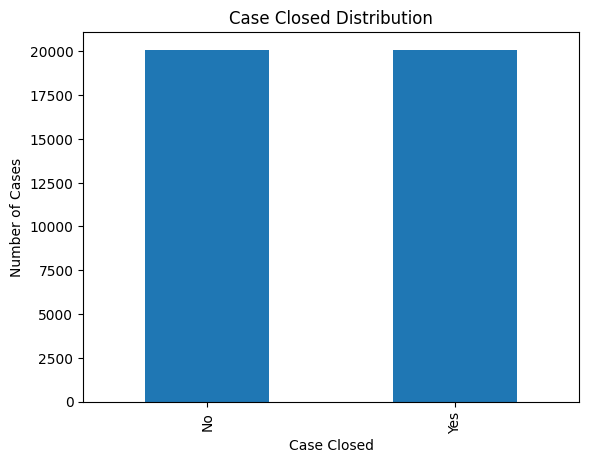

In [10]:
import matplotlib.pyplot as plt

df['Case Closed'].value_counts().plot(kind='bar')
plt.title("Case Closed Distribution")
plt.ylabel("Number of Cases")
plt.show()


In [11]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

df['Year'] = df['Date Reported'].dt.year

df.groupby('Year')['Case Closed'].value_counts(normalize=True)


Year    Case Closed
2020.0  No             0.502028
        Yes            0.497972
2021.0  No             0.511380
        Yes            0.488620
2022.0  No             0.502745
        Yes            0.497255
2023.0  Yes            0.517971
        No             0.482029
2024.0  No             0.509804
        Yes            0.490196
Name: proportion, dtype: float64

In [12]:
city_closure = (
    df.groupby('City')['Case Closed']
    .value_counts(normalize=True)
    .unstack()
    .sort_values(by='Yes', ascending=False)
)

city_closure.head()


Case Closed,No,Yes
City,,
Thane,0.463173,0.536827
Ludhiana,0.470434,0.529566
Faridabad,0.471751,0.528249
Rajkot,0.484375,0.515625
Kanpur,0.486511,0.513489


In [13]:
df.groupby('Case Closed')['Police Deployed'].describe()


,count,mean,std,min,25%,50%,75%,max
Case Closed,,,,,,,,
No,20098.0,10.020102,5.478370,1.0,5.0,10.0,15.0,19.0
Yes,20062.0,9.992374,5.457595,1.0,5.0,10.0,15.0,19.0


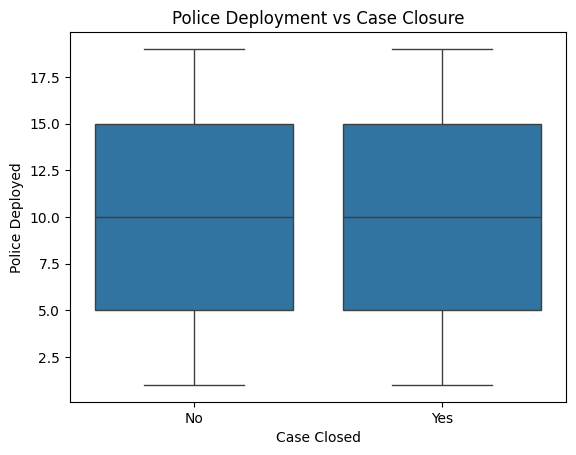

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Case Closed', y='Police Deployed', data=df)
plt.title("Police Deployment vs Case Closure")
plt.show()


In [15]:
bins = [0, 5, 10, 15, 20, 50]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['Police_Level'] = pd.cut(df['Police Deployed'], bins=bins, labels=labels)
pd.crosstab(df['Police_Level'], df['Case Closed'], normalize='index')


Case Closed,No,Yes
Police_Level,,
Very Low,0.501526,0.498474
Low,0.497509,0.502491
Medium,0.499202,0.500798
High,0.504412,0.495588


In [16]:
crime_closure = (
    df.groupby('Crime Description')['Case Closed']
    .value_counts(normalize=True)
    .unstack()
    .sort_values(by='Yes', ascending=False)
)

crime_closure.head(10)
crime_closure.tail(10)


Case Closed,No,Yes
Crime Description,,
KIDNAPPING,0.502083,0.497917
HOMICIDE,0.502357,0.497643
CYBERCRIME,0.502370,0.497630
ASSAULT,0.502872,0.497128
FIREARM OFFENSE,0.503366,0.496634
DRUG OFFENSE,0.506878,0.493122
ARSON,0.508976,0.491024
VANDALISM,0.511392,0.488608
SEXUAL ASSAULT,0.515389,0.484611


In [17]:
crime_counts = df['Crime Description'].value_counts()

crime_summary = crime_closure.join(crime_counts.rename('Total_Cases'))

crime_summary.sort_values(by='Total_Cases', ascending=False).head(10)


,No,Yes,Total_Cases
Crime Description,,,
BURGLARY,0.518182,0.481818,1980
VANDALISM,0.511392,0.488608,1975
FRAUD,0.499237,0.500763,1965
DOMESTIC VIOLENCE,0.490166,0.509834,1932
FIREARM OFFENSE,0.503366,0.496634,1931
ROBBERY,0.501556,0.498444,1928
KIDNAPPING,0.502083,0.497917,1920
IDENTITY THEFT,0.496872,0.503128,1918
SEXUAL ASSAULT,0.515389,0.484611,1917


<Axes: xlabel='Crime Description'>

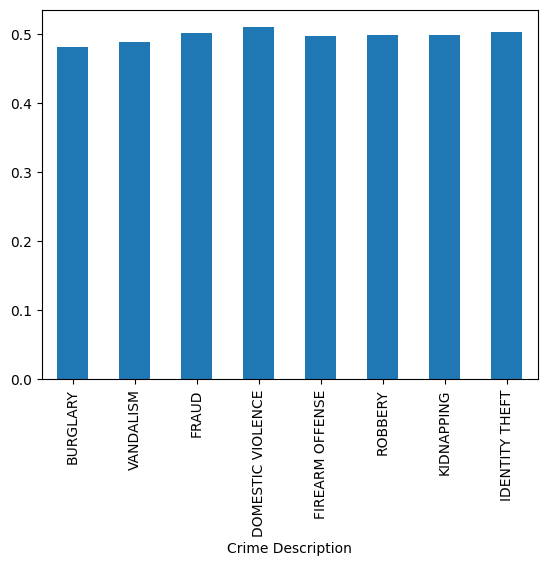

In [18]:
top_crimes = crime_counts.head(8).index

plot_df = crime_closure.loc[top_crimes]

plot_df['Yes'].plot(kind='bar')


In [19]:
domain_closure = (
    df.groupby('Crime Domain')['Case Closed']
    .value_counts(normalize=True)
    .unstack()
)

domain_closure


Case Closed,No,Yes
Crime Domain,,
Fire Accident,0.506144,0.493856
Other Crime,0.499477,0.500523
Traffic Fatality,0.498695,0.501305
Violent Crime,0.500785,0.499215


In [20]:
bins = [0, 5, 10, 15, 20, 50]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Police_Level'] = pd.cut(df['Police Deployed'], bins=bins, labels=labels)
crime = 'BURGLARY'

subset = df[df['Crime Description'] == crime]

pd.crosstab(
    subset['Police_Level'],
    subset['Case Closed'],
    normalize='index'
)


Case Closed,No,Yes
Police_Level,,
Very Low,0.495127,0.504873
Low,0.563851,0.436149
Medium,0.516129,0.483871
High,0.494200,0.505800


In [21]:
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')
weapon_closure = (
    df.groupby('Weapon Used')['Case Closed']
    .value_counts(normalize=True)
    .unstack()
    .sort_values(by='Yes', ascending=False)
)

weapon_closure


Case Closed,No,Yes
Weapon Used,,
Unknown,0.493610,0.506390
Other,0.498238,0.501762
Blunt Object,0.499216,0.500784
Knife,0.501971,0.498029
Explosives,0.503217,0.496783
Firearm,0.503278,0.496722
Poison,0.503666,0.496334


In [22]:
weapon_counts = df['Weapon Used'].value_counts()
weapon_summary = weapon_closure.join(weapon_counts.rename('Total_Cases'))
weapon_summary


,No,Yes,Total_Cases
Weapon Used,,,
Unknown,0.493610,0.506390,5790
Other,0.498238,0.501762,5676
Blunt Object,0.499216,0.500784,5737
Knife,0.501971,0.498029,5835
Explosives,0.503217,0.496783,5751
Firearm,0.503278,0.496722,5643
Poison,0.503666,0.496334,5728


In [24]:
df_Delhi = df[df['City'] == "Delhi"]
df_Delhi

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year,Police_Level
5,6,2020-02-01 03:00:00,01-01-2020 05:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00,2020.0,High
10,11,2020-02-01 13:00:00,01-01-2020 10:00,01-01-2020 19:42,Delhi,260,FRAUD,71,M,Explosives,Other Crime,5,Yes,01-02-2020 13:00,2020.0,Very Low
32,33,2020-03-01 04:00:00,01-02-2020 08:00,03-01-2020 03:01,Delhi,319,ILLEGAL POSSESSION,73,F,Knife,Other Crime,19,No,NaN,2020.0,High
42,43,2020-03-01 03:00:00,01-02-2020 18:00,03-01-2020 09:30,Delhi,172,FIREARM OFFENSE,40,M,Poison,Fire Accident,10,Yes,17-03-2020 03:00,2020.0,Low
46,47,2020-05-01 04:00:00,01-02-2020 22:00,03-01-2020 09:55,Delhi,555,ROBBERY,47,F,Unknown,Violent Crime,9,No,NaN,2020.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40131,40132,NaT,07-30-2024 03:00,30-07-2024 22:45,Delhi,144,ROBBERY,43,F,Poison,Violent Crime,15,Yes,24-01-2025 08:00,NaN,Medium
40134,40135,NaT,07-30-2024 06:00,30-07-2024 12:21,Delhi,389,ARSON,40,M,Blunt Object,Fire Accident,15,No,NaN,NaN,Medium
40142,40143,2024-01-08 22:00:00,07-30-2024 14:00,30-07-2024 16:55,Delhi,237,VEHICLE - STOLEN,21,M,Poison,Violent Crime,7,No,NaN,2024.0,Low
40146,40147,2024-02-08 09:00:00,07-30-2024 18:00,30-07-2024 19:32,Delhi,400,ROBBERY,34,F,Other,Violent Crime,11,Yes,29-11-2024 09:00,2024.0,Medium


In [25]:
df_Delhi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5400 entries, 5 to 40159
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       5400 non-null   int64         
 1   Date Reported       2114 non-null   datetime64[ns]
 2   Date of Occurrence  5400 non-null   object        
 3   Time of Occurrence  5400 non-null   object        
 4   City                5400 non-null   object        
 5   Crime Code          5400 non-null   int64         
 6   Crime Description   5400 non-null   object        
 7   Victim Age          5400 non-null   int64         
 8   Victim Gender       5400 non-null   object        
 9   Weapon Used         5400 non-null   object        
 10  Crime Domain        5400 non-null   object        
 11  Police Deployed     5400 non-null   int64         
 12  Case Closed         5400 non-null   object        
 13  Date Case Closed    2646 non-null   object        
 